In [31]:
# CSS styling within IPython notebook
from IPython.display import display, HTML
display(HTML(open('custom.css').read()))

In [5]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>

# 投资知识分享
 


#  投资三大要素
***
## 1. 风险   
 - 投资中，风险是收益的不确定性（波动性）  
 
## 2. 收益率   
 - 收益率=收益/投资成本      
 - 考虑货币的时间价值 （信用卡的分期->利息成本）

## 3. 流动性   
- 多快的速度能够成交？ 
      -  房子
      -  股票
      -  基金
      -  贵金属


#  大类资产趋势
***
## 1. 房地产 —— 短多长空
 - 人口基本面偏于负面
 - 低利率杠杆工具
 - 通胀对抗工具
 
## 2. 权益市场  —— 市盈率中枢下降
 - 信托收缩的影响
 - 经济基本面的影响
 - 注册制的影响
 
## 3.  优先端理财 —— 谨防违约


#  家庭资产配置
***
## 1. 房产
 - 消费型必备
 - 投资型聚焦年轻城市
 - 保持流动性的情况下负债运行
 
## 2. 权益市场  
 - 指数基金被动投资为主
 - 网格投资或者定投
 - 老年方向及科技方向的行业领导股
 
## 3. 优先端理财
 - 调低收益目标
 - 投前分析穿透到产品
 
## 4. 货币基金
 - 作为现金管理工具

In [2]:
#coding:utf-8
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
mypop=pd.read_excel("popu.xls")
mypop['Year']=mypop['Year'].str.slice(0,4) #去掉年字
mypop['Year']=pd.to_datetime(mypop['Year'])#转换为日期

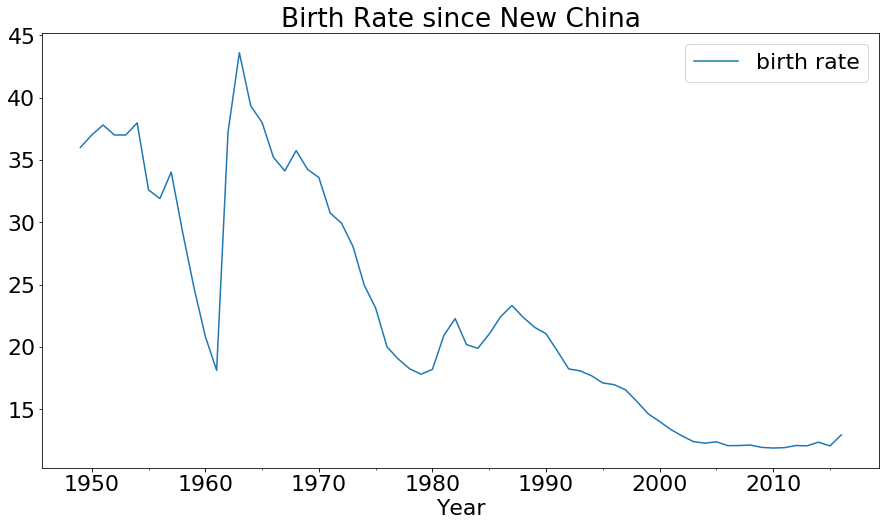

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
mypop.plot(x='Year',y='birth rate',legend=True ,figsize=(15,8),title="Birth Rate since New China")#画图
plt.show()

In [4]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
money=ts.get_money_supply() #取货币供应数据
money['month']=pd.to_datetime(money['month'])
money.set_index('month')
money=money[money['m2_yoy'].str.match("^\d{1,}\.{0,1}\d{0,}")]#只取m2增长比例有数字的行
money['m2_yoy']=pd.to_numeric(money['m2_yoy'])#改为数字格式
mycpi=ts.get_cpi()
mycpi['cpi']=pd.to_numeric(mycpi['cpi'])-100  #同比改为增长率
mycpi['month']=pd.to_datetime(mycpi['month']) #日期格式标准化
mycpi.set_index('month') #设置index，便于plot

,cpi
month,
2017-12-01,1.85
2017-11-01,1.73
2017-10-01,1.87
2017-09-01,1.60
2017-08-01,1.77
2017-07-01,1.40
2017-06-01,1.64
2017-05-01,1.52
2017-04-01,1.17


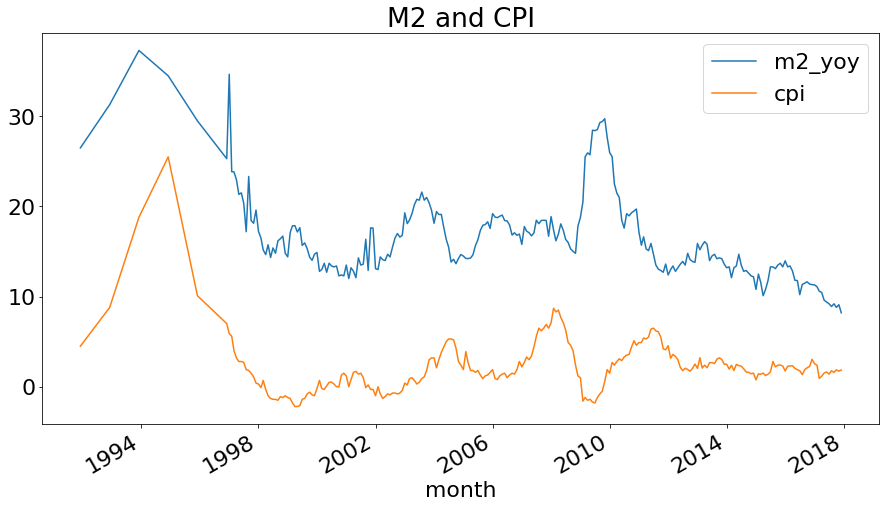

In [5]:
m2_cpi=pd.merge(money.loc[:,['month','m2_yoy']],mycpi,on='month')
m2_cpi.plot(x='month',legend=True ,figsize=(15,8),title="M2 and CPI")
plt.show()

In [6]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
szzz=ts.get_k_data('sh',start='2005-1-1')
etf50=ts.get_k_data('000016',start='2005-1-1',index=True)
szzz.index=pd.DatetimeIndex(szzz.pop('date'))
etf50.index=pd.DatetimeIndex(etf50.pop('date'))#日期转换为标准格式的index，便于按照时间格式显示。
szvs50=pd.concat((szzz.loc[:,['close']],etf50.loc[:,['close']]),axis=1)
szvs50.columns=['szzz','sz50']
#print(szvs50.columns)


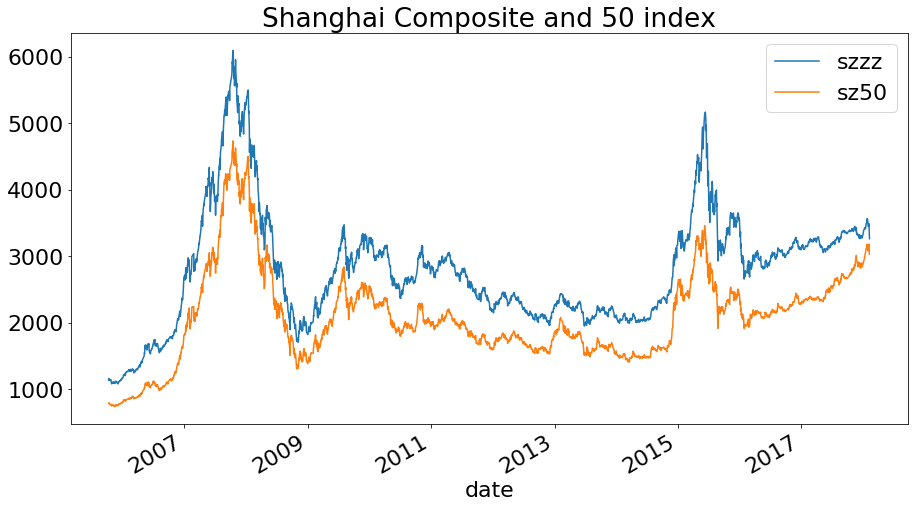

In [7]:
szvs50.plot(legend=True ,figsize=(15,8),title="Shanghai Composite and 50 index")#取收盘指数画图
plt.show()

In [8]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
hryy=ts.get_k_data('600276',start='2005-1-1')
hryy.index=pd.DatetimeIndex(hryy.pop('date'))

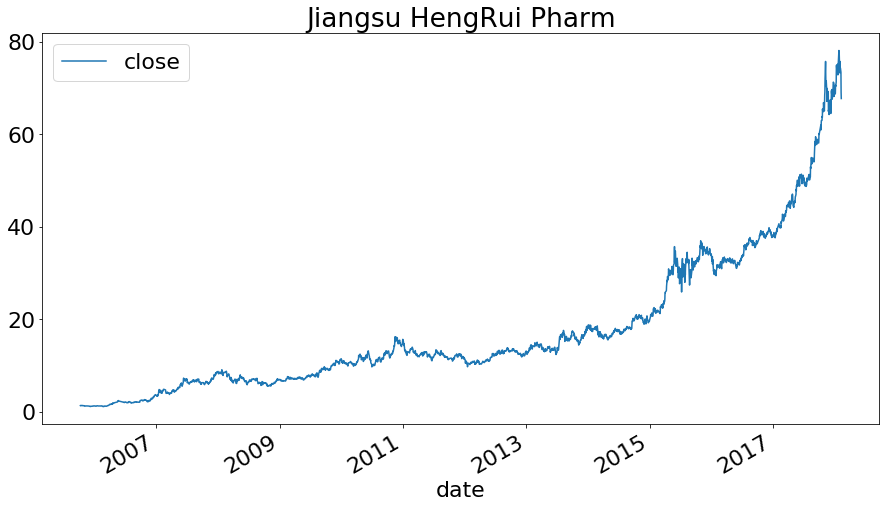

In [9]:
hryy.plot(y='close',legend=True ,figsize=(15,8),title="Jiangsu HengRui Pharm")#取收盘指数画图
plt.show()

# 以平常心，行平常事   
***
## 1. 相信常识      
- 天上不会掉馅饼   
- 太美好的事情就是欺骗     

## 2. 知道买的是什么   
- 尽量不要买黑盒子   
- 了解大致的风险排序   

## 3. 知道什么是便宜   
- 关注未来而不是当前   
- 绝对价格没有意义   
- 了解收益风险比   
- 大赚小赔   



# 应该有自己的投资系统   
***
## 1.   目标   
## 2.   计划
   - 买什么
   - 何时买入
   - 何时卖出   
 
## 3.   应急处理  
   - 急需用钱
   - 经济危机


# 推荐书籍
***
## 1. 漫步华尔街   
## 2.专业投机原理   
## 3.巴菲特的护城河   




# 不要相信别人，只相信你自己   
***
## 1. 盈利系统是不传之秘      
- 那么厉害，为什么还靠讲台和书籍赚钱   
- 人人沿用则会无效（收益率下降）     

## 2.  防诈骗，看住本金
- 你惦记别人的利息，别人惦记着你的本金

## 3.  上市公司的忽悠
- 獐子岛 会跑路的扇贝

## 4. 拒绝伪价值投资



# 股神——沃伦.巴菲特
***
 1. ** _要在别人贪婪的时候恐惧_ ** ，而在别人恐惧的时候贪婪。
 2. 如果你没有持有一种股票10年的准备，那么连10分钟都不要持有这种股票。
 3. “不要把所有鸡蛋放在同一个篮子里”的谬论是错误的，投资应该像马克.吐温建议的“把所有鸡蛋放在同一个篮子里，然后小心地看好它。”
 4. 如果你想要打中罕见且移动迅速的大象，那么你应该随时把枪带在身上
 5. 只有退潮时，你才知道谁是在裸体游泳。
 6. 当一家有实力的大公司遇到一次巨大但可以化解的危机时，一个绝好的投资机会就悄然来临。
 7. **投资企业而不是股票。**
 8. 拥有一只股票，期待它明天早晨就上涨是十分愚蠢的。
 9. 即使美联储主席偷偷告诉我未来两年的货币政策，我也不会为之改变我的任何投资作为。
 10. 我喜欢简单的东西。



# 金融大鳄——乔治.索罗斯
***
 1. 炒作就像动物世界的森林法则，专门攻击弱者，这种做法往往能够百发百中
 2. 我生来一贫如洗，但决不能死时仍旧贫困潦倒。
 3. **判断对错并不重要，重要的在于正确时获取了多大利润，错误时亏损了多少**
 4. 在股票市场上，寻求别人还没有意识到的突变。
 5. **承担风险，无可指责，但同时记住千万不能孤注一掷。**
 6. **股市通常是不可信赖的，因而，如果在华尔街地区你跟着别人赶时髦，那么，你的股票经营注定是十分惨淡的。**
 7. 身在市场，你就得准备忍受痛苦。
 8. 对任何事情，我和其他人犯同样多的错误，不过，我的超人之处在于我能认识自己的错误。
 9. 要想获得成功，必须要有充足的自由时间。
 10. **你不用什么都懂，但你必须在某一方面懂得比别人多。**



# 基金史上的传奇人物——彼得.林奇
***
 1. 公司的状况与股票的状况有100%的相关性。
 2. **周期性行业的股票要在市盈率高时买进，市盈率低时卖出。**
 3. 买进有赢利能力企业的股票，在没有极好的理由时不要抛掉。
 4. **只要用心对股票作一点点研究，普通投资者也能成为股票投资专家，并且在选股方面的成绩能像华尔街专家一样出色。**
 5. 不进行研究的投资，就像打扑克从不看牌一样，必然失败。
 6. 最终决定投资者命运的既不是股票市场也不是那些上市公司，而是投资者自己决定了自己的命运。
 7. 炒股要有自信，没有自信就会失败。
 8. **行情总在绝望中诞生，在半信半疑中成长，在憧憬中成熟，在希望中毁灭。**
 9. **股市赢家法则是：不买落后股，不买平庸股，全心全力锁定领导股。**
 10. **让趋势成为你的朋友。**



# 技术分析大师——威廉.江恩
***
二十世纪最著名的投资家之一。他认为，股价运动方式不是杂乱无章的，而是可以预测的。每一种股票都拥有一个独特的波动率，它主宰着市场价位的升跌。
他还认为，时间是决定市场走势的最重要因素，历史确实重复发生，你了解过去，便可以预测将来。
 1. ** 不在成交量大增之后买进，不在成交量大减之后卖出。**
 2. 阳光之下没有新东西。
 3. 当你一旦完全掌握角度线，你就能够解决任何问题，并决定任何股票的趋势
 4. 仅介入交易活跃的股票，避免介入那些运动缓慢、成交稀少的股票。
 5. 市场趋势不明显时，宁可在场外观望。
 6. 只有业绩好的个股才会有较强的抗跌性。
 7. 图表能反映出一切股市或公司股民的总体心理状况。
 8. 调整只会让股市更加健康。
 9. **不要一次性买进，傲慢就是罪过。**
 10. **买卖遭损失时，切忌赌徒式加码，以谋求摊低成本。**



# 投机奇才——安德烈.科斯托兰尼
***
安德烈.科斯托拉尼是一个彻头彻尾的投机者，是一位活到93岁的犹太人。20世纪股市见证人、20世纪金融史上最成功的投资者之一，是一位一直受到上帝眷顾的人。
他在德国投资界的地位，有如美国股神沃伦.巴菲特。
 1. **崩盘通常以暴涨为前导，而暴涨都以崩盘收尾，一再重复。**
 2. 病人不是死于疾病，而是死于人们给他的药。
 3. **当价格开始上扬时，这只股票的交易额越小，情况越乐观。**
 4. 任何一个软件顶多只和它的程序设计者一样聪明。
 5. 货币之于证券市场，就像氧气之于呼吸，汽油之于引擎。
 6. 价格密集盘整之后的突破，通常是值得冒险的交易机会。
 7. 回撤常常在缺口处停住。
 8. 那些最有名气的上市公司的股票最容易投机过度。
 9. 股票永远不会太高，高到让你不能开始买进，也永远不会太低，低到不能开始卖出。
 10. **在长达80年的证券交易中，我至少学到一点：投机是种艺术，而不是科学。**



In [10]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
allstock=ts.get_stock_basics()
hs300list=ts.get_hs300s()
sz50list=ts.get_sz50s()
#hs300list


http://www.csindex.com.cn/uploads/file/autofile/closeweight/000300closeweight.xls


/home/brian/.local/lib/python3.5/site-packages/tushare/stock/classifying.py:263: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


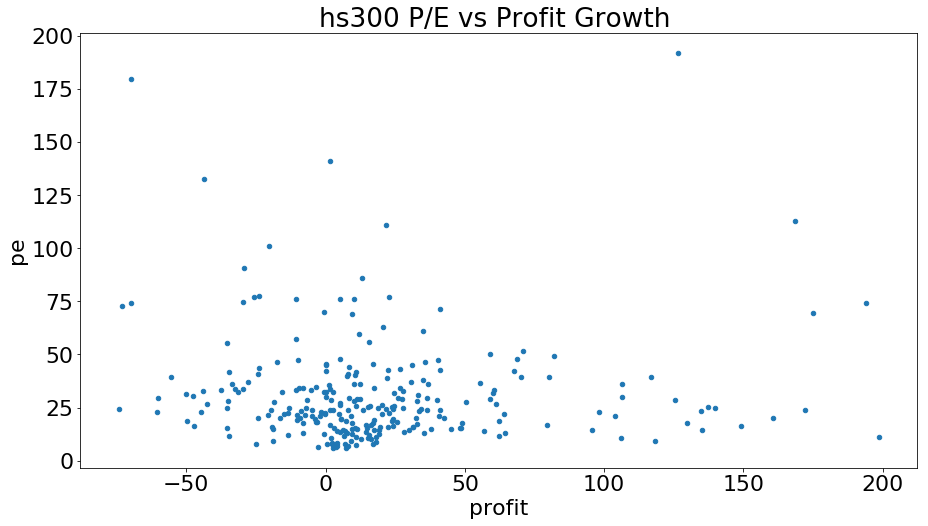

In [11]:
hs300stock2=allstock.loc[hs300list['code']]
hs300stock=hs300stock2[(hs300stock2.pe<200)&(hs300stock2.pe>0)&(abs(hs300stock2.profit)<200)]
hs300stock.plot(x='profit',y='pe',kind='scatter',legend=True ,figsize=(15,8),title="hs300 P/E vs Profit Growth ")
plt.show()

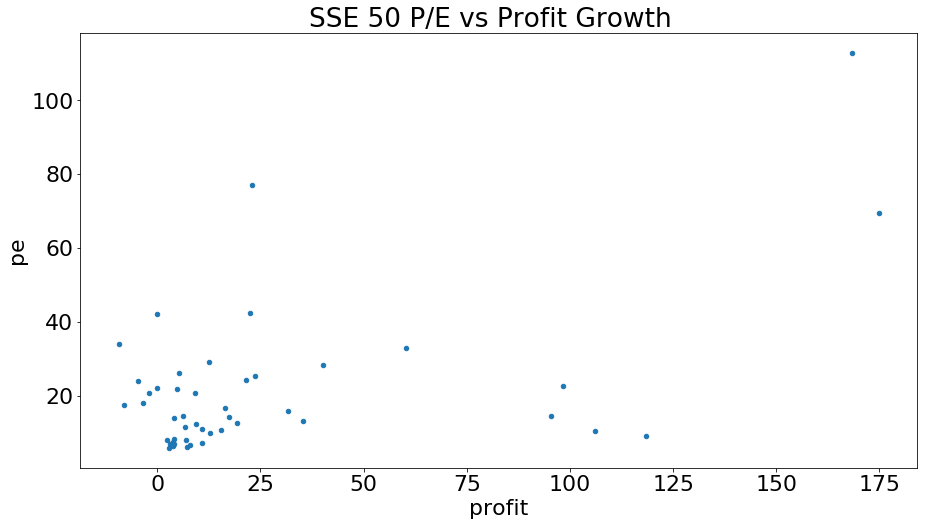

In [12]:
sz50stock2=allstock.loc[sz50list['code']]
sz50stock=sz50stock2[(sz50stock2.pe<200)&(sz50stock2.pe>0)&(abs(sz50stock2.profit)<200)]
sz50stock.plot(x='profit',y='pe',kind='scatter',legend=True ,figsize=(15,8),title="SSE 50 P/E vs Profit Growth  ")
plt.show()

In [13]:
findstock=sz50stock2[(sz50stock2.pe<200)&(sz50stock2.profit>100)&(abs(sz50stock2.profit)<200)]
findstock

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
600050,中国联通,电信运营,上海,112.86,211.97,302.34,59056808.0,9962275.00,35827208.00,2781473.75,...,3.72,1.75,20021009,3074480.25,1.02,-0.66,168.42,25.71,0.64,787261.0
601006,大秦铁路,铁路,山西,9.30,148.67,148.67,12906953.0,2773182.25,6869881.50,2473709.25,...,6.55,1.43,20060801,4758561.00,3.20,32.13,118.37,31.59,26.92,151119.0
601088,中国神华,煤炭开采,北京,10.65,164.91,198.90,56003400.0,12097900.00,30580700.00,7472900.00,...,14.69,1.73,20071009,17336300.00,8.72,46.26,105.98,41.69,19.53,204189.0
603993,洛阳钼业,小金属,河南,69.56,129.54,215.99,10020716.0,3879243.50,2492202.25,2763653.00,...,1.73,3.99,20121009,452227.69,0.21,406.47,174.98,35.33,9.06,271587.0
